# **IMPORTING NECESSARY LIBRARIES AND USUAL KAGGLE  STUFF**

In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNetCV
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


# **GENERAL LOOK THROUGH THE DATA**

In [34]:
train_data = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [35]:
train_data.shape

(1460, 81)

# **TRYING TO VISUALLY OBSERVE ANY RELATION BETWEEN SALEPRICE AND OTHER NUMERIC COLUMNS**

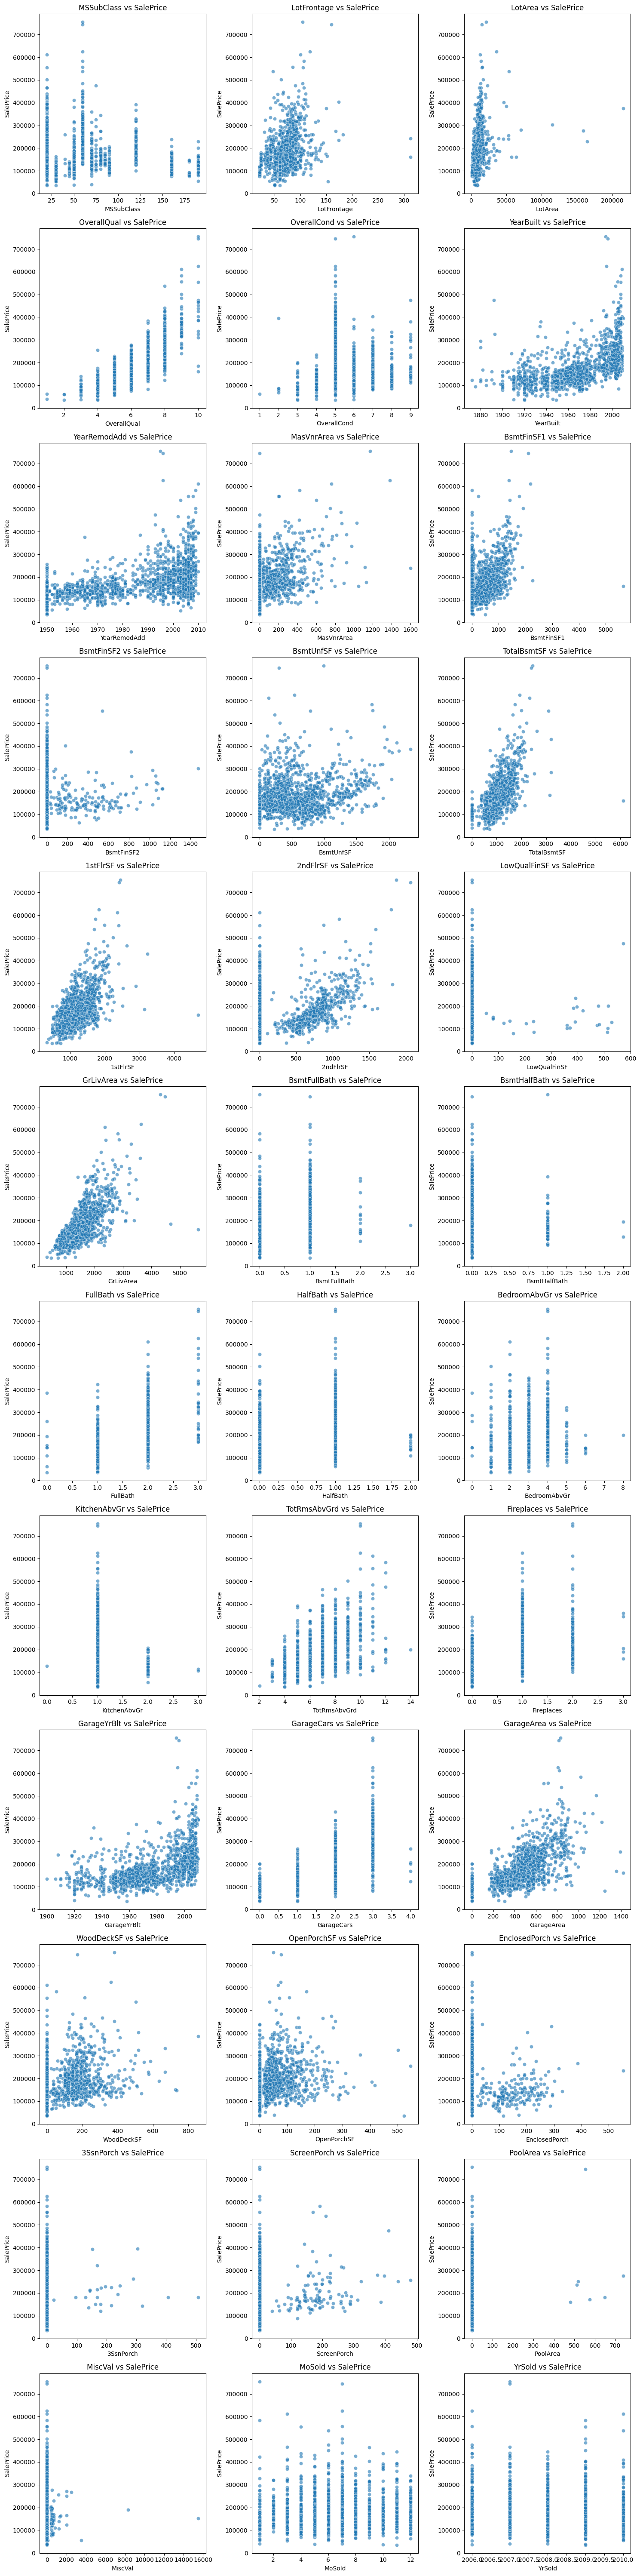

In [36]:
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
cols_to_plot = [col for col in numeric_cols if col not in ['Id', 'SalePrice']]

num_plots = len(cols_to_plot)
cols = 3
rows = int(np.ceil(num_plots / cols))

plt.figure(figsize=(15, 5 * rows)) 

for i, col in enumerate(cols_to_plot):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(x=train_data[col], y=train_data['SalePrice'], alpha=0.6)
    plt.title(f'{col} vs SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

# **REMOVING IRRELEVANT NUMERICAL COLUMNS AND OUTLIERS FROM THE SCATTERPLOT**

In [37]:
columns_to_drop = ['MiscVal','PoolArea','3SsnPorch','LowQualFinSF']
train_data = train_data.drop(columns=columns_to_drop)
outliers1 = train_data[(train_data['GrLivArea'] > 4000) & (train_data['SalePrice'] > 100000)].index
train_data = train_data.drop(outliers1)
outliers2 = train_data[(train_data['GrLivArea'] > 4000) & (train_data['SalePrice'] > 700000)].index
train_data = train_data.drop(outliers2)
outliers3 = train_data[(train_data['1stFlrSF'] > 3500) & (train_data['SalePrice'] > 100000)].index
train_data = train_data.drop(outliers3)
outliers4 = train_data[(train_data['1stFlrSF'] > 2000) & (train_data['SalePrice'] > 700000)].index
train_data = train_data.drop(outliers4)
outliers5 = train_data[(train_data['TotalBsmtSF'] > 4000) & (train_data['SalePrice'] > 100000)].index
train_data = train_data.drop(outliers5)
outliers6 = train_data[(train_data['BsmtFinSF1'] > 3000) & (train_data['SalePrice'] > 100000)].index
train_data = train_data.drop(outliers6)
outliers7 = train_data[(train_data['MasVnrArea'] > 1000) & (train_data['SalePrice'] > 550000)].index
train_data = train_data.drop(outliers7)
outliers8 = train_data[(train_data['LotArea'] > 150000) & (train_data['SalePrice'] > 200000)].index
train_data = train_data.drop(outliers8)
outliers9 = train_data[(train_data['LotFrontage'] > 250) & (train_data['SalePrice'] > 100000)].index
train_data = train_data.drop(outliers9)
train_data.shape

(1451, 77)

# **APPLYING LOGARITHM FOR SKEWED NUMERIC COLUMNS IN ACCORDANCE WITH STATISTICAL PRINCIPLES**

In [38]:
numeric_feats = train_data.dtypes[train_data.dtypes != "object"].index

skewed_feats = train_data[numeric_feats].apply(lambda x: skew(x.dropna())) 
skewed_feats = skewed_feats[skewed_feats > 0.75] 
skewed_feats = skewed_feats.index
print(skewed_feats)
print(f"Detected {len(skewed_feats)} skewed columns. Applying log1p...")

train_data[skewed_feats] = np.log1p(train_data[skewed_feats])

Index(['MSSubClass', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
       'SalePrice'],
      dtype='object')
Detected 15 skewed columns. Applying log1p...


# **CHECKING FOR MUTLICOLLINEARITY BETWEEN FEATURES USING A HEATMAP**

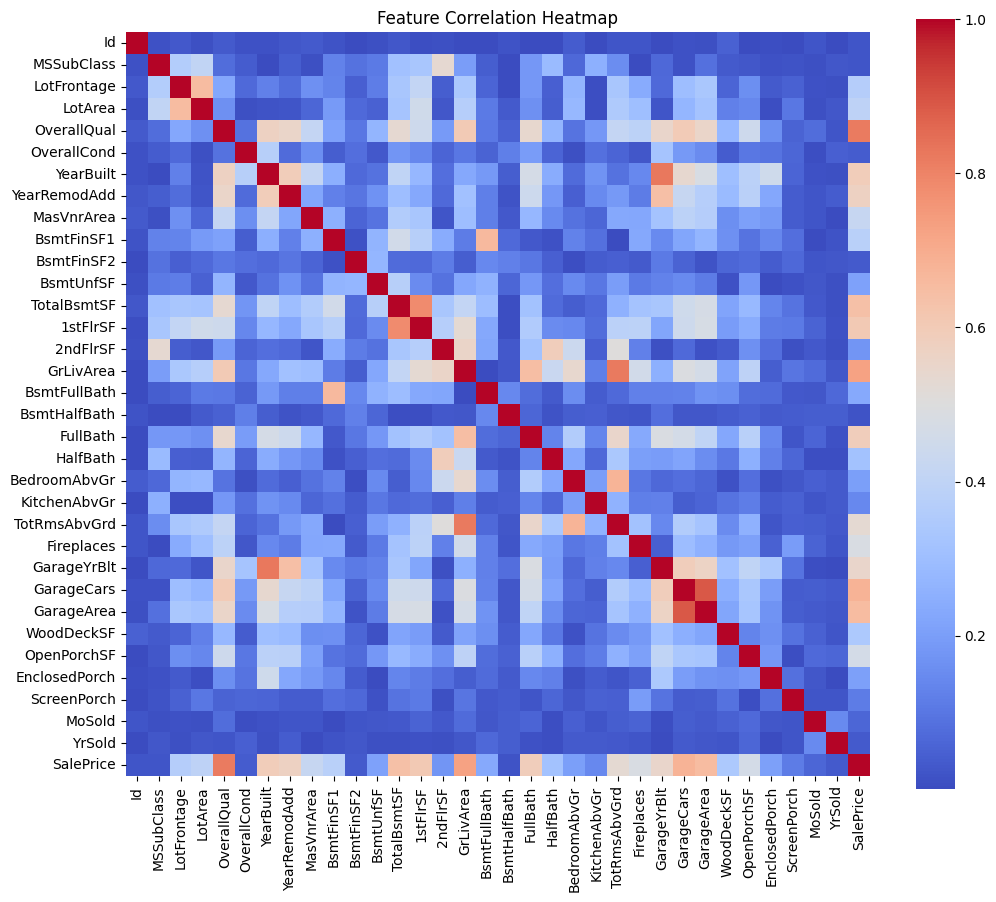

In [39]:
corr_matrix = train_data[numeric_feats].corr().abs()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# **FURTHER CHECKING STRONGLY CORRELATED COLUMNS**

In [40]:
cols_to_check = ['YearBuilt','GarageYrBlt','TotalBsmtSF','1stFlrSF','GrLivArea','TotRmsAbvGrd','GarageCars','GarageArea']
for col in cols_to_check:
    print(f"{train_data[col].isna().sum()} Missing values in {col} column")
    print(f"Correlation between column {col} and SalePrice is {train_data[col].corr(train_data['SalePrice'])}")

0 Missing values in YearBuilt column
Correlation between column YearBuilt and SalePrice is 0.5922098018576759
81 Missing values in GarageYrBlt column
Correlation between column GarageYrBlt and SalePrice is 0.5490240879916832
0 Missing values in TotalBsmtSF column
Correlation between column TotalBsmtSF and SalePrice is 0.6395689484710104
0 Missing values in 1stFlrSF column
Correlation between column 1stFlrSF and SalePrice is 0.6083333929255598
0 Missing values in GrLivArea column
Correlation between column GrLivArea and SalePrice is 0.7303490077448256
0 Missing values in TotRmsAbvGrd column
Correlation between column TotRmsAbvGrd and SalePrice is 0.5305799642056702
0 Missing values in GarageCars column
Correlation between column GarageCars and SalePrice is 0.6805907735500674
0 Missing values in GarageArea column
Correlation between column GarageArea and SalePrice is 0.6562271887064038


# **REMOVING STRONGLY CORRELATED COLUMNS**

In [41]:
cols_to_drop = ['GarageYrBlt','1stFlrSF','TotRmsAbvGrd','GarageArea']
for col in cols_to_drop:
    train_data = train_data.drop(col,axis = 1)
train_data.shape

(1451, 73)

# **CHECKING MISSING VALUES**


In [42]:
missing_val_count_by_column = (train_data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage      257
Alley           1360
MasVnrType       868
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1446
Fence           1171
MiscFeature     1399
dtype: int64


# **DROPPING COLUMNS WITH MORE THAN 80% MISSING DATA**


In [43]:
miss_cols_to_drop = ['Alley','PoolQC','Fence','MiscFeature']
for col in miss_cols_to_drop:
    train_data = train_data.drop(col, axis = 1)
train_data.shape

(1451, 69)

# **TRYING TO FIND RELATIONSHIP BETWEEN EXISTING VALUES AND MISSING VALUES**


In [44]:
no_fplace_rows = train_data[train_data['Fireplaces']==0]
print(no_fplace_rows['FireplaceQu'].isnull().sum())
fplace_rows = train_data[train_data['Fireplaces'] > 0]
print(fplace_rows['FireplaceQu'].isnull().sum())
no_bsmnt_rows = train_data[train_data['BsmtQual']=='NA']
print(no_bsmnt_rows['BsmtCond'].isnull().sum())
bsmnt_rows = train_data[train_data['BsmtQual'] != 'NA']
print(bsmnt_rows['BsmtCond'].isnull().sum())
no_bsmnt1_rows = train_data[train_data['BsmtFinSF1']== 0]
print(no_bsmnt1_rows['BsmtFinType1'].isnull().sum())
bsmnt1_rows = train_data[train_data['BsmtFinSF1'] > 0]
print(bsmnt1_rows['BsmtFinType1'].isnull().sum())
no_bsmnt2_rows = train_data[train_data['BsmtFinSF2']== 0]
print(no_bsmnt2_rows['BsmtFinType2'].isnull().sum())
bsmnt2_rows = train_data[train_data['BsmtFinSF2'] > 0]
print(bsmnt2_rows['BsmtFinType2'].isnull().sum())
mask_train = (train_data['MasVnrType'].isnull()) & (train_data['MasVnrArea'] == 0)
train_data.loc[mask_train, 'MasVnrType'] = "None"
print(train_data['MasVnrType'].isnull().sum())
missing_mas_vnr = train_data[train_data['MasVnrType'].isnull()]
print(missing_mas_vnr[['MasVnrType', 'MasVnrArea']])
anomaly_row = train_data[(train_data['BsmtExposure'].isnull()) & (train_data['BsmtCond'].notnull())]
print(anomaly_row[['BsmtExposure', 'BsmtCond']])
no_bsmt_group = train_data[(train_data['BsmtExposure'].isnull()) & (train_data['BsmtCond'].isnull())]
print(f"\nRows where both are missing (No Basement): {len(no_bsmt_group)}")

anomaly_condition = (train_data['BsmtFinSF2'] > 0) & (train_data['BsmtFinType2'].isnull())
train_data.loc[anomaly_condition, 'BsmtFinType2'] = "Anomaly"
print(train_data[train_data['BsmtFinType2'] == "Anomaly"][['BsmtFinSF2', 'BsmtFinType2']])
mask_double_missing = (train_data['MasVnrType'].isnull()) & (train_data['MasVnrArea'].isnull())
train_data.loc[mask_double_missing, 'MasVnrType'] = "None"
train_data.loc[mask_double_missing, 'MasVnrArea'] = 0
sanomaly_condition = (train_data['MasVnrArea'] > 0) & (train_data['MasVnrType'].isnull())
train_data.loc[sanomaly_condition, 'MasVnrType'] = "Anomaly"
anomaly_idx = train_data[(train_data['BsmtExposure'].isnull()) & (train_data['BsmtCond'].notnull())].index
train_data.loc[anomaly_idx, 'BsmtExposure'] = "Anomaly"

train_data['Electrical'] = train_data['Electrical'].fillna(train_data['Electrical'].mode()[0])

690
0
0
37
37
0
37
1
13
     MasVnrType  MasVnrArea
234         NaN         NaN
529         NaN         NaN
624         NaN    5.666427
650         NaN         NaN
773         NaN    0.693147
936         NaN         NaN
973         NaN         NaN
977         NaN         NaN
1230        NaN    0.693147
1243        NaN         NaN
1278        NaN         NaN
1300        NaN    5.843544
1334        NaN    5.746203
    BsmtExposure BsmtCond
948          NaN       TA

Rows where both are missing (No Basement): 37
     BsmtFinSF2 BsmtFinType2
332    6.173786      Anomaly


# **FILLING THE MISSING VALUES**


In [45]:
none_cols = ['GarageQual','GarageCond','GarageFinish','GarageType','FireplaceQu','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure']
for col in none_cols:
    train_data[col] = train_data[col].fillna("NA")
train_data['GarageCars'] = train_data['GarageCars'].fillna(0)


# **FILLING THE MISSING LOTFRONTAGE VALUES USING KNN IMPUTER**


In [46]:
features_to_use = ['LotFrontage', 'LotArea', 'Street', 'LotConfig', 'LotShape', 'BldgType', 'Neighborhood']
temp_df = train_data[features_to_use].copy()

# ORDINAL ENCODING (Manual Map for LotShape)
lot_shape_map = {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}
temp_df['LotShape'] = temp_df['LotShape'].map(lot_shape_map)

# ONE-HOT ENCODING (For Nominal Columns)
nominal_cols = ['Street', 'LotConfig', 'BldgType', 'Neighborhood']
temp_df = pd.get_dummies(temp_df, columns=nominal_cols, drop_first=True)

# SCALING
scaler = MinMaxScaler()
temp_df_columns = temp_df.columns 
temp_scaled = scaler.fit_transform(temp_df)

# IMPUTATION
imputer = KNNImputer(n_neighbors=5)
temp_filled_scaled = imputer.fit_transform(temp_scaled)

# INVERSE TRANSFORM & ASSIGNMENT
temp_filled = scaler.inverse_transform(temp_filled_scaled)


temp_filled_df = pd.DataFrame(temp_filled, columns=temp_df_columns)
train_data['LotFrontage'] = temp_filled_df['LotFrontage']

# **DOING SUITABLE MODIFICATIONS FOR TEST DATA**

In [47]:
test_data = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")
columns_to_drop = ['MiscVal','PoolArea','3SsnPorch','LowQualFinSF']
test_data = test_data.drop(columns=columns_to_drop)
# Capping test data outliers instead of deleting them
test_data.loc[test_data['GrLivArea'] > 4000, 'GrLivArea'] = 4000
test_data.loc[test_data['1stFlrSF'] > 3500, '1stFlrSF'] = 3500
test_data.loc[test_data['TotalBsmtSF'] > 4000, 'TotalBsmtSF'] = 4000
test_data.loc[test_data['BsmtFinSF1'] > 3000, 'BsmtFinSF1'] = 3000
test_data.loc[test_data['MasVnrArea'] > 1000, 'MasVnrArea'] = 1000
test_data.loc[test_data['LotArea'] > 150000, 'LotArea'] = 150000
test_data.loc[test_data['LotFrontage'] > 250, 'LotFrontage'] = 250
test_numeric_feats = test_data.dtypes[test_data.dtypes != "object"].index
test_skewed_feats = test_data[test_numeric_feats].apply(lambda x: skew(x.dropna())) 
test_skewed_feats = test_skewed_feats[test_skewed_feats > 0.75] 
test_skewed_feats = test_skewed_feats.index
test_data[test_skewed_feats] = np.log1p(test_data[test_skewed_feats])
test_cols_to_drop = ['GarageYrBlt','1stFlrSF','TotRmsAbvGrd','GarageArea','Alley','PoolQC','Fence','MiscFeature']
for col in test_cols_to_drop:
    test_data = test_data.drop(col,axis = 1)
test_no_fplace_rows = test_data[test_data['Fireplaces']==0]
test_fplace_rows = test_data[test_data['Fireplaces'] > 0]
test_no_bsmnt_rows = test_data[test_data['BsmtQual']=='NA']
test_bsmnt_rows = test_data[test_data['BsmtQual'] != 'NA']
test_no_bsmnt1_rows = test_data[test_data['BsmtFinSF1']== 0]
test_bsmnt1_rows = test_data[test_data['BsmtFinSF1'] > 0]
test_no_bsmnt2_rows = test_data[test_data['BsmtFinSF2']== 0]
test_bsmnt2_rows = test_data[test_data['BsmtFinSF2'] > 0]
test_mask_train = (test_data['MasVnrType'].isnull()) & (test_data['MasVnrArea'] == 0)
test_data.loc[test_mask_train, 'MasVnrType'] = "None"
test_missing_mas_vnr = test_data[test_data['MasVnrType'].isnull()]
test_anomaly_row = test_data[(test_data['BsmtExposure'].isnull()) & (test_data['BsmtCond'].notnull())]
test_no_bsmt_group = test_data[(test_data['BsmtExposure'].isnull()) & (test_data['BsmtCond'].isnull())]
test_anomaly_condition = (test_data['BsmtFinSF2'] > 0) & (test_data['BsmtFinType2'].isnull())
test_data.loc[test_anomaly_condition, 'BsmtFinType2'] = "Anomaly"
test_mask_double_missing = (test_data['MasVnrType'].isnull()) & (test_data['MasVnrArea'].isnull())
test_data.loc[test_mask_double_missing, 'MasVnrType'] = "None"
test_data.loc[test_mask_double_missing, 'MasVnrArea'] = 0
test_sanomaly_condition = (test_data['MasVnrArea'] > 0) & (test_data['MasVnrType'].isnull())
test_data.loc[test_sanomaly_condition, 'MasVnrType'] = "Anomaly"
test_anomaly_idx = test_data[(test_data['BsmtExposure'].isnull()) & (test_data['BsmtCond'].notnull())].index
test_data.loc[test_anomaly_idx, 'BsmtExposure'] = "Anomaly"
test_data['Electrical'] = test_data['Electrical'].fillna(test_data['Electrical'].mode()[0])
test_none_cols = ['GarageQual','GarageCond','GarageFinish','GarageType','FireplaceQu','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure']
for col in none_cols:
    test_data[col] = test_data[col].fillna("NA")
test_data['GarageCars'] = test_data['GarageCars'].fillna(0)
features_to_use = ['LotFrontage', 'LotArea', 'Street', 'LotConfig', 'LotShape', 'BldgType', 'Neighborhood']
test_temp_df = test_data[features_to_use].copy()
lot_shape_map = {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}
test_temp_df['LotShape'] = test_temp_df['LotShape'].map(lot_shape_map)
nominal_cols = ['Street', 'LotConfig', 'BldgType', 'Neighborhood']
test_temp_df = pd.get_dummies(test_temp_df, columns=nominal_cols, drop_first=True)
scaler = MinMaxScaler()
test_temp_df_columns = test_temp_df.columns 
test_temp_scaled = scaler.fit_transform(test_temp_df)
test_imputer = KNNImputer(n_neighbors=5)
test_temp_filled_scaled = test_imputer.fit_transform(test_temp_scaled)
test_temp_filled = scaler.inverse_transform(test_temp_filled_scaled)
test_temp_filled_df = pd.DataFrame(test_temp_filled, columns=test_temp_df_columns)
test_data['LotFrontage'] = test_temp_filled_df['LotFrontage']



# **TRAINING ML MODEL (ELASTICNETCV)**

In [48]:
features_to_use = [col for col in test_data.columns if col != 'Id']

X = train_data[features_to_use]
y = train_data['SalePrice'] 
X_test_final = test_data[features_to_use]

num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object', 'category']).columns

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()) 
])
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')) 
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])
elastic_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
                               alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                               cv=5, max_iter=50000))
])
print("Training ElasticNet...")
elastic_model.fit(X, y)
print(f"ElasticNet Trained (Best Alpha: {elastic_model.named_steps['regressor'].alpha_})")
elastic_preds = elastic_model.predict(X_test_final)

final_preds = np.expm1(elastic_preds)

submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': final_preds})
submission.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' created successfully.")

Training ElasticNet...
ElasticNet Trained (Best Alpha: 0.001)
Submission file 'submission.csv' created successfully.


# **References** :-
1. [https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python](http://)
2. [https://www.kaggle.com/code/juliencs/a-study-on-regression-applied-to-the-ames-dataset](http://)
3. [https://www.kaggle.com/code/apapiu/regularized-linear-models](http://)